# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Integrantes:** Diego Olivares, Amelie Ramirez y Zhibin Xue <br>

# <h1><center>Análisis de Tendencias en Videos Musicales de YouTube: Patrones que Influyen en el Éxito de los Videos Musicales</center></h1>

Esto es una pequeña extracción de mi protecto al que pueden acceder desde este [LINK](https://github.com/wattmoox/Proyecto_Data_Sience.git)

## Contexto y Motivación

En la era digital, plataformas como Spotify, YouTube y Last.fm han transformado la forma en que se consume y promociona la música, permitiendo una experiencia personalizada y global. Este proyecto busca analizar, mediante datos de estas aplicaciones, los factores que influyen en el éxito de una canción. El objetivo es identificar patrones y relaciones que ayuden a artistas y productoras a optimizar sus estrategias de lanzamiento y promoción musical.


De las preguntas originales, se pudieron responder las siguientes:

1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

## Datos

### Spotify API:

Esta api se utilizó para crear las bases de datos:

1. `spotify_global.csv`: 50 canciones tendencia de la aplicación en el mundo
2. `youtube_en_spotify.csv`: Los videos tendencia de Chile, EEUU y el Mundo en YouTube buscados en Spotify

Todas cuentan con las columnas:

* Titulo: Str
* Artista: Str
* Popularidad: Int
* Generos: List

Ademas, las bases de datos hechas con youtube tienen las columnas respectivas de esa base de datos

### Youtube API:

Esta api se utilizó para crear las bases de datos:

1. `videos_chile.csv`: 30 videos tendencia en Chile (No deja visualizar más de 30)
2. `videos_global.csv`: 30 videos tendencia en el mundo (No deja visualizar más de 30)
3. `videos_eeuu.csv`: 30 videos tendencia en Estados Unidos (No deja visualizar más de 30)
4. `videos_last.fm_global.csv`: Los 50 videos tendencia del mundo en Last.fm buscados en Youtube
5. `videos_spotify_global.csv`: Los 50 videos tendencia del mundo en Spotify buscados en Youtube

Todas cuentan con las columnas:
Titulo,Vistas,Likes,Comentarios,Fecha,Tags
* Titulo: Str
* Vistas: Int
* Likes: Int
* Comentarios: Int
* Fecha: Str -> DateTime
* Tags: Str

## Imports

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

### 1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

In [15]:
# Creamos un dataframe en conjunto para el análisis

yt_chile = pd.read_csv("data/videos_chile.csv")
yt_global = pd.read_csv("data/videos_global.csv")
yt_eeuu = pd.read_csv("data/videos_eeuu.csv")

yt_merged = pd.concat([yt_global, yt_eeuu, yt_chile]).drop_duplicates().reset_index(drop=True)
yt_merged.head()

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]


<Axes: xlabel='Vistas', ylabel='Likes'>

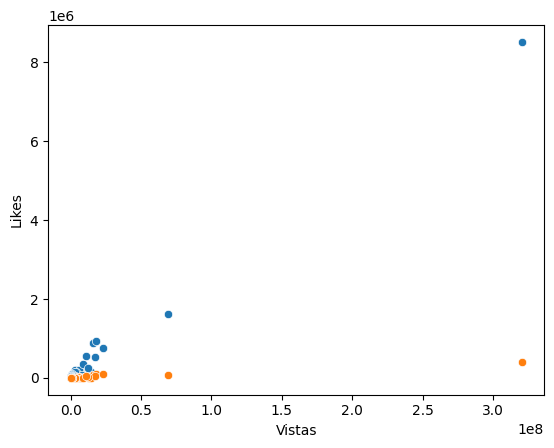

In [16]:
# Revisamos las correlaciones

sns.scatterplot(x='Vistas', y='Likes', data=yt_merged)
sns.scatterplot(x='Vistas', y='Comentarios', data=yt_merged)

In [17]:
correlaciones = yt_merged[["Vistas", "Likes", "Comentarios"]]

maximo_comentarios = correlaciones["Comentarios"].max()
print(maximo_comentarios)

maximo_vista = correlaciones["Vistas"].max()
print(maximo_vista)
#sns.pairplot(correlaciones)

390972
320363632


<Axes: xlabel='Vistas', ylabel='Likes'>

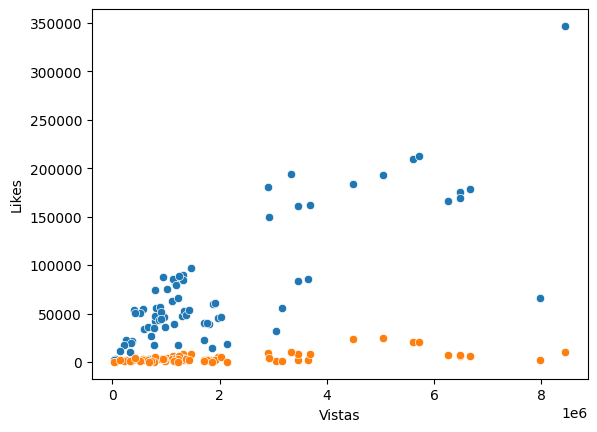

In [18]:
# Quitamos los datos mayores puesto que hacen que el rango sea muy grande
correlaciones = correlaciones[correlaciones["Comentarios"] < 390972]
correlaciones = correlaciones[correlaciones["Vistas"] < 8515277]

sns.scatterplot(x='Vistas', y='Likes', data=correlaciones)
sns.scatterplot(x='Vistas', y='Comentarios', data=correlaciones)

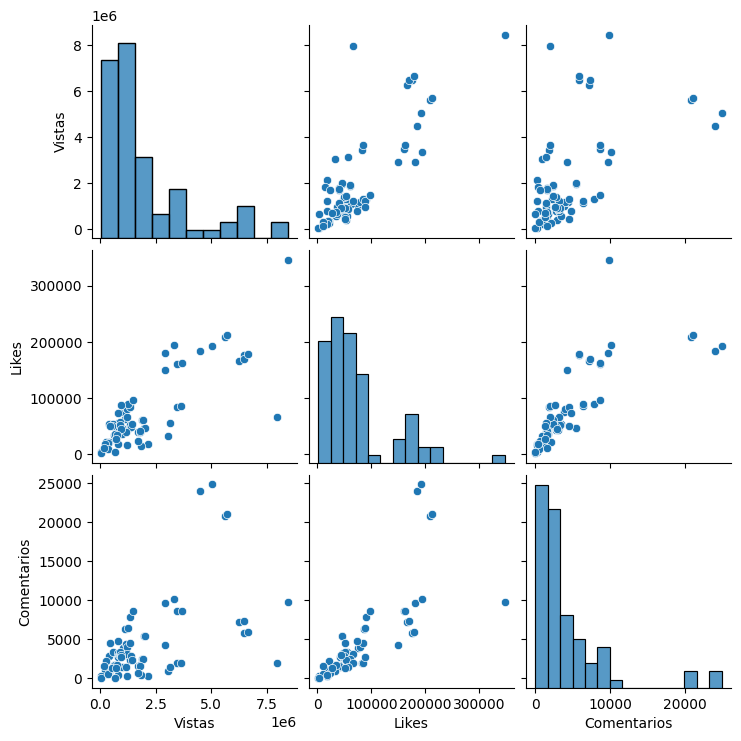

In [19]:
sns.pairplot(correlaciones)

<Axes: >

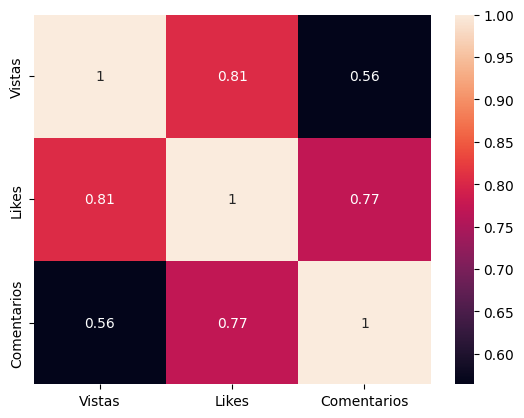

In [20]:
sns.heatmap(correlaciones.corr(),annot=True)

### **Respuesta**

Según lo observado en el gráfico de pares y el mapa de calor.
- Existe una **fuerte relación positiva** entre las visualizaciones y los *likes*, con un coeficiente de 0.81. Además, el gráfico muestra una tendencia clara y ascendente.
- La relación entre visualizaciones y comentarios es menor. Aunque hay una conexión, no es tan significativa como la anterior incluso mostrando un gráfico más desordenado y dificil de interpretar.

#### Conclusión
La característica más relacionada con el aumento de visualizaciones son los **likes**, lo que sugiere que los videos que reciben más *likes* suelen generar un mayor número de visualizaciones.

### 2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

In [22]:
# Para responder estas preguntas analizaremos cuantos titulos están dentro de los dos dataframes

"""sp_chile = pd.read_csv("data/spotify_chile.csv")
sp_global = pd.read_csv("data/spotify_global.csv")
sp_eeuu = pd.read_csv("data/spotify_eeuu.csv")
sp_merged = pd.concat([sp_global, sp_eeuu, sp_chile]).drop_duplicates().reset_index(drop=True)

last_chile = pd.read_csv("data/last.fm_chile.csv")
last_global = pd.read_csv("data/last.fm_global.csv")
last_eeuu = pd.read_csv("data/last.fm_eeuu.csv")
last_merged = pd.concat([last_global, last_eeuu, last_chile]).drop_duplicates().reset_index(drop=True)"""

'sp_chile = pd.read_csv("data/spotify_chile.csv")\nsp_global = pd.read_csv("data/spotify_global.csv")\nsp_eeuu = pd.read_csv("data/spotify_eeuu.csv")\nsp_merged = pd.concat([sp_global, sp_eeuu, sp_chile]).drop_duplicates().reset_index(drop=True)\n\nlast_chile = pd.read_csv("data/last.fm_chile.csv")\nlast_global = pd.read_csv("data/last.fm_global.csv")\nlast_eeuu = pd.read_csv("data/last.fm_eeuu.csv")\nlast_merged = pd.concat([last_global, last_eeuu, last_chile]).drop_duplicates().reset_index(drop=True)'

In [23]:
# Para responder esta pregunta creamos un csv con las canciones en tendencia en spotify buscadas en youtube

yt_spotify_1 = pd.read_csv("data/videos_spotify_global.csv")
yt_lastf_1 = pd.read_csv("data/videos_last.fm_global.csv")
yt_global_1 = pd.read_csv("data/videos_global.csv")
yt_global_1.head()

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]


In [24]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"


In [25]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_lastf_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"
2,Sticky


In [26]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_lastf_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,"Lady Gaga, Bruno Mars - Die With A Smile (Offi..."
1,Sailor Song
2,St. Chroma
3,"Billie Eilish, Khalid - lovely"
4,Sabrina Carpenter - Please Please Please (Offi...
5,ROSÉ & Bruno Mars - APT. (Official Music Video)
6,"Good Luck, Babe!"
7,Wiz Khalifa - See You Again ft. Charlie Puth [...
8,Sabrina Carpenter - Espresso (Official Video)
9,Like Him


### **Respuesta** 

- Al analizar los *dataframes* que cruzan títulos populares en YouTube con Spotify, se observa que **no existe una gran similitud** entre los éxitos de estas plataformas. Esto indica que el éxito en YouTube no se traduce automáticamente en popularidad en Spotify.
- De manera similar, los títulos exitosos de YouTube tampoco presentan una conexión significativa con los de Last.fm.

#### Conclusión  
Aunque no se encontró una relación sólida entre YouTube y las otras plataformas, **sí existe una fuerte similitud** entre los éxitos de Spotify y Last.fm, lo que sugiere una mayor convergencia en los gustos musicales de los usuarios en estas dos plataformas.

### 3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify?

In [27]:
#hacemos lectura del csv a ocupar
yt_en_spotify = pd.read_csv("data/youtube_en_spotify_global.csv")

In [28]:
#visualizamos el df
yt_en_spotify.head()

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Artista,Popularidad,Generos
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,"['reggaeton', 'reggaeton colombiano', 'urbano ..."
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,"['baton rouge rap', 'rap']"
2,YoungBoy Never Broke Again - Killa Season,1164882,81449,4392,2024-11-08T04:16:17Z,[],YoungBoy Never Broke Again,59,"['baton rouge rap', 'rap']"
3,YoungBoy Never Broke Again - Missing Everything,1132351,86119,6341,2024-11-08T02:20:12Z,[],YoungBoy Never Broke Again,57,"['baton rouge rap', 'rap']"
4,YoungBoy Never Broke Again - Catch Me,812399,55568,2963,2024-11-08T02:20:09Z,[],YoungBoy Never Broke Again,54,"['baton rouge rap', 'rap']"


In [29]:
#evaluamos de forma distinta las cadenas
yt_en_spotify['Generos'] = yt_en_spotify['Generos'].apply(ast.literal_eval)

In [30]:
df_exploded = yt_en_spotify.explode('Generos')

In [31]:
df_exploded.head()

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Artista,Popularidad,Generos
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,reggaeton
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,reggaeton colombiano
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57'],KAROL G,84,urbano latino
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,baton rouge rap
1,YoungBoy Never Broke Again - Sneaking,1029066,75819,3901,2024-11-08T03:41:23Z,[],YoungBoy Never Broke Again,59,rap


In [32]:
df_exploded["Cantidad"] = 1

In [33]:
#agrupamos segun el tipo de genero que son para saber su cantidad
df_generos = df_exploded[["Generos", "Cantidad"]].groupby('Generos').sum().reset_index()

In [34]:
#visualizamos la informacion y vemos que aun existen generos que se podrian agrupar más
df_generos.head(10)

,Generos,Cantidad
0,5th gen k-pop,1
1,atl hip hop,1
2,baton rouge rap,7
3,bc underground hip hop,1
4,canadian hip hop,1
5,ccm,1
6,corrido,2
7,corridos tumbados,1
8,country rap,1
9,dembow,1


In [35]:
def categorizar_genero(genero):
    if 'pop' in genero:
        return 'Pop'
    elif 'rap' in genero:
        return 'Rap'
    elif 'reggaeton' in genero:
        return 'Reggaeton'
    elif 'corrido' in genero:
        return 'Corridos'
    elif 'worship' in genero or 'ccm' in genero:
        return 'Religioso'
    elif 'rock' in genero:
        return 'Rock'
    elif 'hip hop' in genero:
        return 'Hip Hop'
    elif 'jazz' in genero:
        return 'Jazz'
    elif 'blues' in genero:
        return 'Blues'
    elif "Urbano" in genero:
        return 'Urbano'
    elif "salsa" in genero:
        return 'Salsa'
    elif "trap" in genero:
        return 'Trap'
    elif "country" in genero:
        return 'Country'
    elif "indie" in genero:
        return 'Indie'
    elif "r&b" in genero:
        return 'r&b'
    elif "singer-songwriter" in genero:
        return 'singer-songwriter'
    elif "soul" in genero:
        return 'singer-songwriter'
    elif "romantic" in genero:
        return 'romantic'
    elif "wave" in genero:
        return 'wave'
    elif "contemporary" in genero:
        return 'contemporary'
    else:
        return genero
#es por esto que creamos una funcion que agrupe de mejor forma los generos
df_generos['Categoria'] = df_generos['Generos'].apply(categorizar_genero)

In [36]:
df_categoria = df_generos[["Categoria", "Cantidad"]].groupby('Categoria').sum().reset_index()

In [37]:
df_categoria

,Categoria,Cantidad
0,Corridos,3
1,Hip Hop,9
2,Pop,4
3,Rap,32
4,Reggaeton,3
5,Religioso,2
6,Rock,1
7,contemporary,1
8,dembow,1
9,florida drill,2


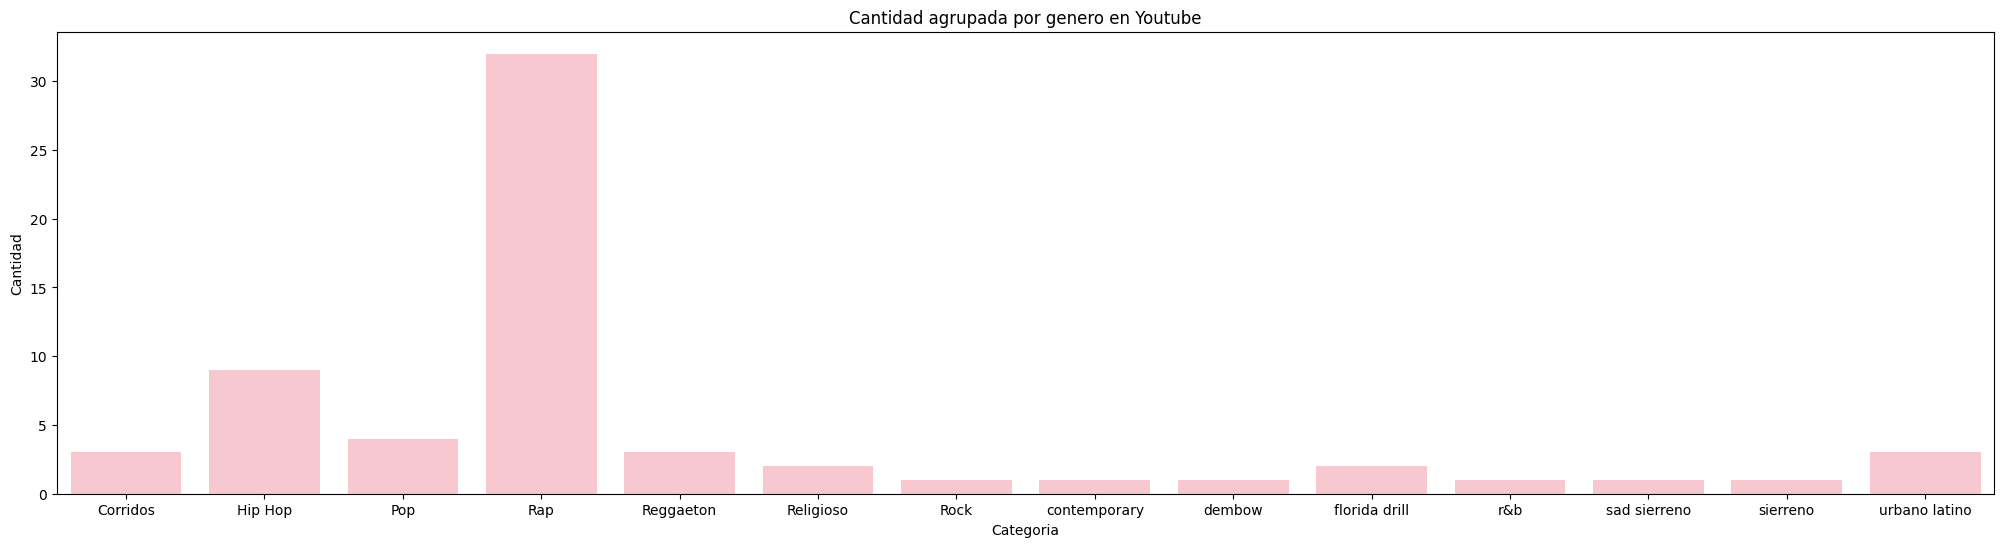

In [38]:
## Gráfico
#creamos el gráfico de barras para poder visualizar la información
fig = plt.figure(figsize=(25,6)) #crear la figura y dimension
ax = fig.add_subplot(111)
sns.barplot(data=df_categoria, x='Categoria', y='Cantidad', color='pink')
plt.title("Cantidad agrupada por genero en Youtube")
plt.show()


,Titulo,Artista,Popularidad,Generos
0,That’s So True,Gracie Abrams,91,['alt z']
1,Die With A Smile,Lady Gaga,100,"['art pop', 'dance pop', 'pop']"
2,Sailor Song,Gigi Perez,93,['bedroom pop']
3,"Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)","Tyler, The Creator",87,"['hip hop', 'rap']"
4,St. Chroma (feat. Daniel Caesar),"Tyler, The Creator",89,"['hip hop', 'rap']"


0                                               [alt z]
1                             [art pop, dance pop, pop]
2                                         [bedroom pop]
3                                        [hip hop, rap]
4                                        [hip hop, rap]
5                                        [art pop, pop]
6                                               [k-pop]
7                                                 [pop]
8                                               [k-pop]
9        [canadian contemporary r&b, canadian pop, pop]
10                                          [indie pop]
11                                       [art pop, pop]
12                                       [hip hop, rap]
13                                              [alt z]
14                                                [pop]
15                                       [hip hop, rap]
16                                       [hip hop, rap]
17                        [modern country pop, p

In [46]:
#hacemos el mismo mecanismo con la plataforma spotify
spotify_glo = pd.read_csv("data/spotify_global.csv")
spotify_glo.head()


spotify_glo['Generos'] = spotify_glo['Generos'].apply(ast.literal_eval)
spotify_glo['Generos']


df_exploracion = spotify_glo.explode('Generos')
df_exploracion["Cantidad"] = 1
df_genero = df_exploracion[["Generos", "Cantidad"]].groupby('Generos').sum().reset_index()
df_genero

def categorizar_genero(genero):
    if 'pop' in genero:
        return 'Pop'
    elif 'rap' in genero:
        return 'Rap'
    elif 'reggaeton' in genero:
        return 'Reggaeton'
    elif 'corrido' in genero:
        return 'Corridos'
    elif 'worship' in genero or 'ccm' in genero:
        return 'Religioso'
    elif 'rock' in genero:
        return 'Rock'
    elif 'hip hop' in genero:
        return 'Hip Hop'
    elif 'jazz' in genero:
        return 'Jazz'
    elif 'blues' in genero:
        return 'Blues'
    elif "Urbano" in genero:
        return 'Urbano'
    elif "salsa" in genero:
        return 'Salsa'
    elif "trap" in genero:
        return 'Trap'
    elif "country" in genero:
        return 'Country'
    elif "indie" in genero:
        return 'Indie'
    elif "r&b" in genero:
        return 'r&b'
    elif "singer-songwriter" in genero:
        return 'singer-songwriter'
    elif "soul" in genero:
        return 'singer-songwriter'
    elif "romantic" in genero:
        return 'romantic'
    elif "wave" in genero:
        return 'wave'
    elif "contemporary" in genero:
        return 'contemporary'
    else:
        return genero

df_genero['Categoria'] = df_genero['Generos'].apply(categorizar_genero)

df_category = df_genero[["Categoria", "Cantidad"]].groupby('Categoria').sum().reset_index()
df_category
        

,Categoria,Cantidad
0,Corridos,2
1,Country,6
2,Hip Hop,13
3,Indie,5
4,Pop,32
5,Rap,14
6,Rock,4
7,alt z,2
8,contemporary,1
9,r&b,1


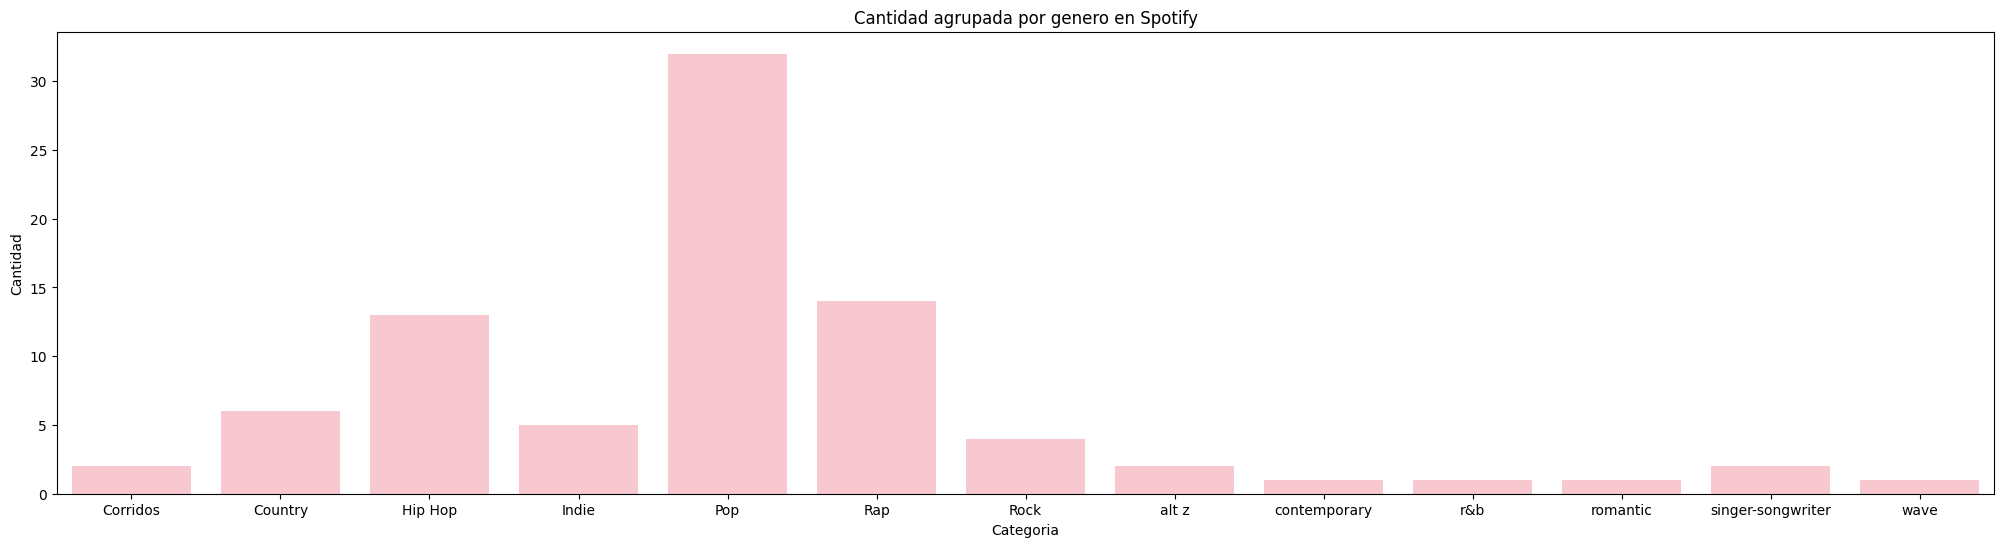

In [47]:
## Gráfico
#creamos el gráfico de barras para poder visualizar la información
fig = plt.figure(figsize=(25,6)) #crear la figura y dimension
ax = fig.add_subplot(111)
sns.barplot(data=df_category, x='Categoria', y='Cantidad', color='pink')
plt.title("Cantidad agrupada por genero en Spotify")
plt.show()

### **Respuesta**  
Los géneros más populares en YouTube son: **Rap**, **Hip Hop** y **Pop**. Estas tendencias también se reflejan en Spotify, ya que los mismos géneros ocupan los primeros lugares en interacción. Sin embargo, el **orden de popularidad varía** entre ambas plataformas.

#### Conclusión  
Las preferencias de los usuarios en YouTube tienen un impacto claro en los géneros más escuchados en Spotify, demostrando una conexión entre ambas plataformas en cuanto a tendencias musicales.